In [1]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy import fft
import sympy as sp
import numpy as np
import math
%run 'shared.ipynb' # holds notes + SP specific functions

In [2]:
# a.1
n = 4
omega_0 = 800

z, p, k = signal.buttap(n)
display(p)

p_1_hp = omega_0/p[0]
p_2_hp = omega_0/p[1]
display(p_1_hp)
display(p_2_hp)

w_01 = abs(p_1_hp)
Q_1 = -(w_01)/(2*p_1_hp.real)
display(w_01, Q_1)

w_02 = abs(p_2_hp)
Q_2 = -(w_02)/(2*p_2_hp.real)
display("w_02 = {}, Q_2 = {}".format(w_02, Q_2))


array([-0.38268343+0.92387953j, -0.92387953+0.38268343j,
       -0.92387953-0.38268343j, -0.38268343-0.92387953j])

(-306.1467458920719-739.1036260090294j)

(-739.1036260090294-306.14674589207186j)

800.0000000000001

1.3065629648763764

'w_02 = 800.0, Q_2 = 0.541196100146197'

In [3]:
# a.2
w_0 = 2*sp.pi*10**3
Q = 5
R_1 = 1*10**3
R_2 = 225*10**3

C_1 = Q/(w_0*R_1)
display(C_1.evalf()*10**(9))
C_2 = 1/(w_0**2*R_1*R_2*C_1)
display(C_2.evalf())

display("w0/Q", w_0/Q, 1/(R_1*4.05*10**(-9)))

q, r1, r2, c1, c2, w0 = sp.symbols("q r_1 r_2 c_1 c_2 w_0")

exp1 = sp.Eq(w0/q, 1/(r1*c1))
exp2 = sp.Eq(w0**2, 1/(r1*r2*c1*c2)).subs({w0: w_0, r1: R_1, r2: R_2, q: Q})
exp3 = sp.Eq(w0/q, 1/(r2*c1)+1/(r2*c2)).subs({w0: w_0, r1: R_1, r2: R_2, q: Q})

sol = sp.solve([exp2, exp3], [c1, c2])
for i, pair in enumerate(sol):
    print("pair: "+str(i+1))
    print("C_1 = {}".format(pair[0].evalf()*10**(9)))
    print("C_2 = {}".format(pair[1].evalf()*10**9))
display(sol[1])
# display(sol[0])
# display(sol[0][0].subs({q: Q, r1: R_1, w0: w_0}).evalf())
# display(sol[0][1].subs({q: Q, r2: R_2, w0: w_0}).evalf())

795.774715459477

1.41471060526129e-10

'w0/Q'

400*pi

246913.58024691357

pair: 1
C_1 = 27.7782033661425
C_2 = 4.05278525223658
pair: 2
C_1 = 4.05278525223658
C_2 = 27.7782033661425


(-(-1/2 + sqrt(5)/6)/(10000000*pi), (sqrt(5)/60000000 + 1/20000000)/pi)

In [4]:
# a.3
Omega_0 = 1500
Omega_s = 500
a_s = 50
ripple_db = 1
omega_s = Omega_0/Omega_s

n = (1/(sp.acosh(omega_s)))*sp.acosh(sp.sqrt((10**(a_s/10)-1)/(10**(ripple_db/10)-1)))
n = math.ceil(n)
display(n)

## c)
e = sp.sqrt(10**(ripple_db/10)-1)
cn = sp.cosh(n*sp.acosh(omega_s))
display(e, cn)
(-10*sp.log(1+e**2*cn**2, 10)).evalf()

## d)
omega_p = Omega_0/Omega_0
a_p = 1

(1/(2*sp.log(omega_s/omega_p,10)))*sp.log((10**(a_s/10)-1)/(10**(a_p/10)-1) ,10)

5

0.508847139909588

3363.00000000000

5.85471819390668

0.5858*(0.5*z**2 + 1.0*z + 0.5)/(1.0*z**2 - 0.1716)

[-1.00000000000000]

[-0.414246303544160, 0.414246303544160]

1.41429261226461

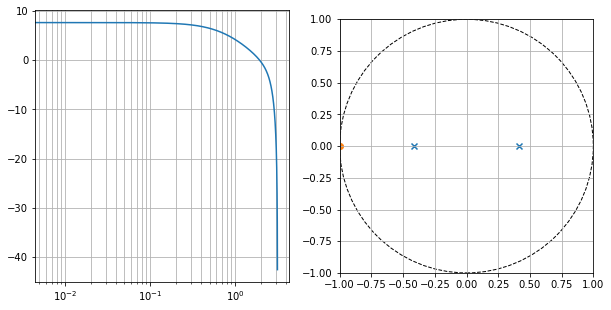

In [10]:
# b.1
z = sp.symbols("z")
H_z = 0.2929*(1+2*z**(-1)+z**(-2))/(1-0.1716*z**(-2))
display(H_z.factor())
zeros = sp.solve(sp.Eq(0.5*z**2+z+0.5, 0), z)
poles = sp.solve(sp.Eq(z**2-0.1716, 0), z)
display(zeros, poles)

display(H_z.subs({z: sp.exp(1j*0)}))

## e/f)
#sys = signal.TransferFunction([1,2,1], [1,0,-0.1716])
#sys = signal.TransferFunction([0.5, 1, 0.5], [1, 0, 1.1716])
#w, mag, phase = signal.bode(sys, n = 10)
#
#plt.figure()
#plt.semilogx(w, mag)
#plt.grid()
#plt.show()
#display(mag)
#plt.semilogx(w, phase)
#plt.show()

## e/f) NEW
tf = signal.TransferFunction([1,2,1], [1,0,-0.1716])
b = tf.num
a = tf.den
zeros = [-1]
poles = [-0.4142, 0.4142]
b, a = signal.zpk2tf(zeros, poles, 1)
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
plotFilterDigital(ax[0], b, a, "")
simplezplane(ax[1], b, a, "")

In [6]:
# b.2
f_c = 3*10**3
f_s = 12*10**3
MVal = 6

w_c = 2*sp.pi*(f_c/f_s)
display(w_c)

w, j, M, n  = sp.symbols("\omega j M n")

firstExp = (sp.sin(sp.pi*(n-(M/2))))/(sp.pi*(n-(M/2)))
lastExp = (sp.sin(w_c*(n-(M/2))))/(sp.pi*(n-(M/2)))
exp = firstExp - lastExp

hdValues = []
for nVal in range(0, MVal+1):
    hdFinal = sp.limit(exp.subs({j: 1j, M: MVal}), n, nVal)
    display("h[{}] = {}".format(nVal, hdFinal))
    hdValues.append(hdFinal)

z, g = sp.symbols("z g")
exp = np.array([val*z**(-i) for i, val in enumerate(hdValues)]).sum()


test = exp.subs({z: sp.exp(1j*0)})
test2 = 20*sp.log(test, 10).evalf()
sol = sp.solve(sp.Eq(-10, 20*sp.log(g*test, 10)), g)
gain = sol[0].evalf()
gainTest = 20*sp.log(gain*test, 10)
display(gain)
display(gainTest.evalf())
display(((10**(-10/20))/test).evalf())
display(test.evalf())

hdValues[0]+hdValues[2]+0.5+hdValues[4]+hdValues[6]

0.5*pi

'h[0] = 1/(3*pi)'

'h[1] = 0'

'h[2] = -1/pi'

'h[3] = 1/2'

'h[4] = -1/pi'

'h[5] = 0'

'h[6] = 1/(3*pi)'

4.18363641465850

-10.0000000000000

4.18363641465850

0.0755868184216124

0.5 - 4/(3*pi)

In [7]:
# c.2
x_1 = [1, 2, 1, -1]
x_2 = [3, -1, 1, -1]

N = 4

X_1 = []
for k in range(len(x_1)):
    X_1.append(np.array([val*sp.exp(-1j*k*n*2*sp.pi/N) for n, val in enumerate(x_1)]).sum().evalf())
display(X_1)

X_2 = []
for k in range(len(x_2)):
    X_2.append(np.array([val*sp.exp(-1j*k*n*2*sp.pi/N) for n, val in enumerate(x_2)]).sum().evalf())
display(X_2)

# c.7
z = sp.symbols("z")
H_X_2_z = np.array([val*z**(-i) for i, val in enumerate(X_2)]).sum()
gain = H_X_2_z.subs({z: sp.exp(1j*(2*sp.pi*777))})
display(H_X_2_z)
display(20*sp.log(gain.evalf(), 10).evalf())

    
    

[3.00000000000000, 0.e-23 - 3.0*I, 1.0 - 0.e-23*I, 0.e-23 + 3.0*I]

[2.00000000000000, 2.0 + 0.e-23*I, 6.0 - 0.e-23*I, 2.0 + 0.e-22*I]

2.0 + (2.0 + 0.e-23*I)/z + (6.0 - 0.e-23*I)/z**2 + (2.0 + 0.e-22*I)/z**3

21.5836249209525 - 2.31357486170928e-21*I

In [8]:
# ANOTHER RUN OF SPECTRAL!
x1n = np.array([1,2,1,-1])
x2n = np.array([3,-1,1,-1])
N = 4
display(x1n, x2n)

# c.1
display("C.1")
## linear + circular
x1nx2nlin = np.convolve(x1n, x2n)
x1nx2ncir = x1nx2nlin[:4]+np.pad(x1nx2nlin[4:], (0,1)) # stupid way of doing it
display(x1nx2nlin, x1nx2ncir)

# c.2) x1n x2n into frequency domain
display("C.2")
X1k = fft.fft(x1n)
X2k = fft.fft(x2n)
display(X1k, X2k)

# c.3) Filter x1 through filter X2 in the frequency domain
display("C.3")
Yk = X1k*X2k
yn =fft.ifft(Yk)
display(Yk, yn)

# http://jntuhsd.in/uploads/programmes/DigitalSignalProcessingModule_7.pdf

# c.6
display("C.6")
fs = 44.1*10**3
N = 4

deltaf = fs/N
T = 1/fs
deltat = T
msx1 = 4*deltat
display(deltaf,msx1)

# testing
#display("TESTING")
#an = np.convolve(x1n,x2n)
#N = 4+4-1
#X1kN = fft.fft(x1n, n=N)
#X2kN = fft.fft(x2n, n=N)
#Yk = X1kN*X2kN
#display(an, Yk, fft.ifft(Yk))
#display(fft.fft(x1nx2ncir))
#display(an, fft.ifft(X1k*X2k), X1k*X2k)
#display(fft.fft(fft.ifft(X1k*X2k)))

array([ 1,  2,  1, -1])

array([ 3, -1,  1, -1])

'C.1'

array([ 3,  5,  2, -3,  0, -2,  1])

array([ 3,  3,  3, -3])

'C.2'

array([3.-0.j, 0.-3.j, 1.-0.j, 0.+3.j])

array([2.-0.j, 2.+0.j, 6.-0.j, 2.-0.j])

'C.3'

array([6.-0.j, 0.-6.j, 6.-0.j, 0.+6.j])

array([ 3.+0.j,  3.+0.j,  3.-0.j, -3.+0.j])

'C.6'

11025.0

9.070294784580499e-05